## Problem statement
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


## Importing Libraries

### Importing required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Importing Stats Model Libraries

In [2]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Importing Scikit Libraries

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Importing other Libraries

In [4]:
import calendar

## Step 1: Reading and Understanding the Data

In [5]:
# load data
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# check datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data cleaning

In [8]:
# checking for null values in dataset
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### It is clear that there are no missing values are present

#### Instant is an index column, so we can drop it

In [9]:
df.drop(['instant'], axis=1, inplace=True)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Column ```dteday```, ```yr``` and ```month``` are having same data so we can drop dteday

In [10]:
df.drop(['dteday'], axis=1, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Model is to build for ```cnt``` so ```casual``` and ```registered``` are redundant here. We can drop these columns

In [11]:
df.drop(['casual', 'registered'], axis=1, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# check datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [13]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

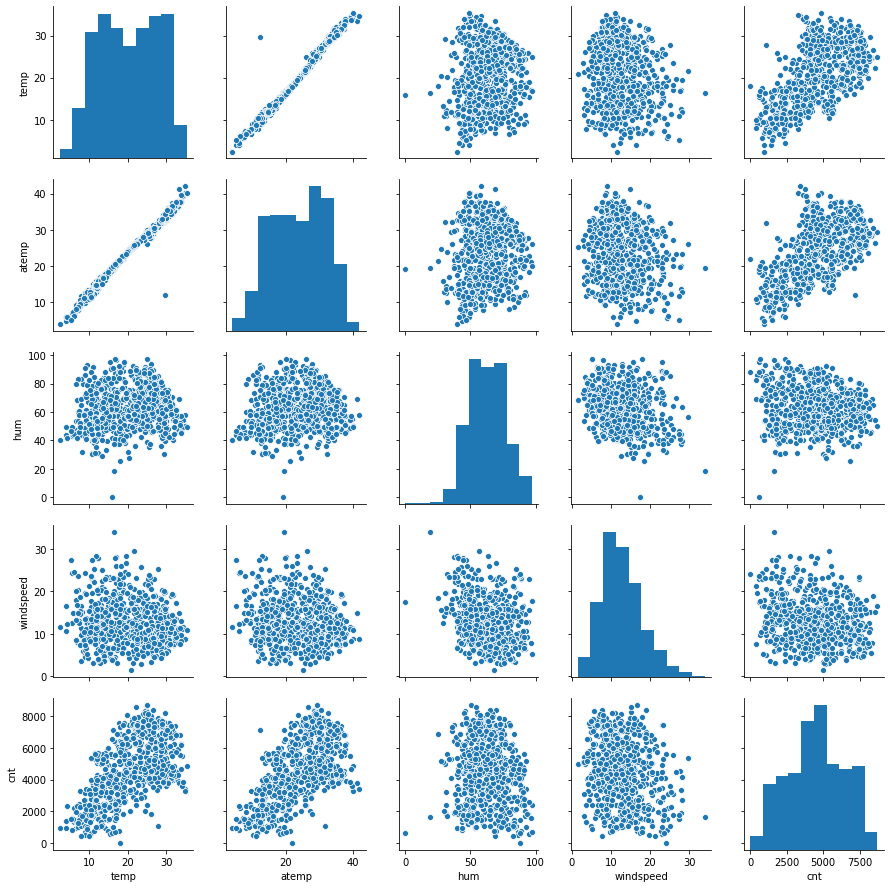

In [14]:
sns.pairplot(df, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [15]:
# function to plot box plot
def plot_boxplot(column_to_category, data, row=3, col=3):
    plt.figure(figsize=(30, 30))
    for i in range(0, len(column_to_category)):
        plt.subplot(row, col, i+1)
        sns.boxplot(x = column_to_category[i], y = 'cnt', data = data)
        plt.title(f"cnt vs {column_to_category[i]}" ,fontsize=20)
    plt.show()

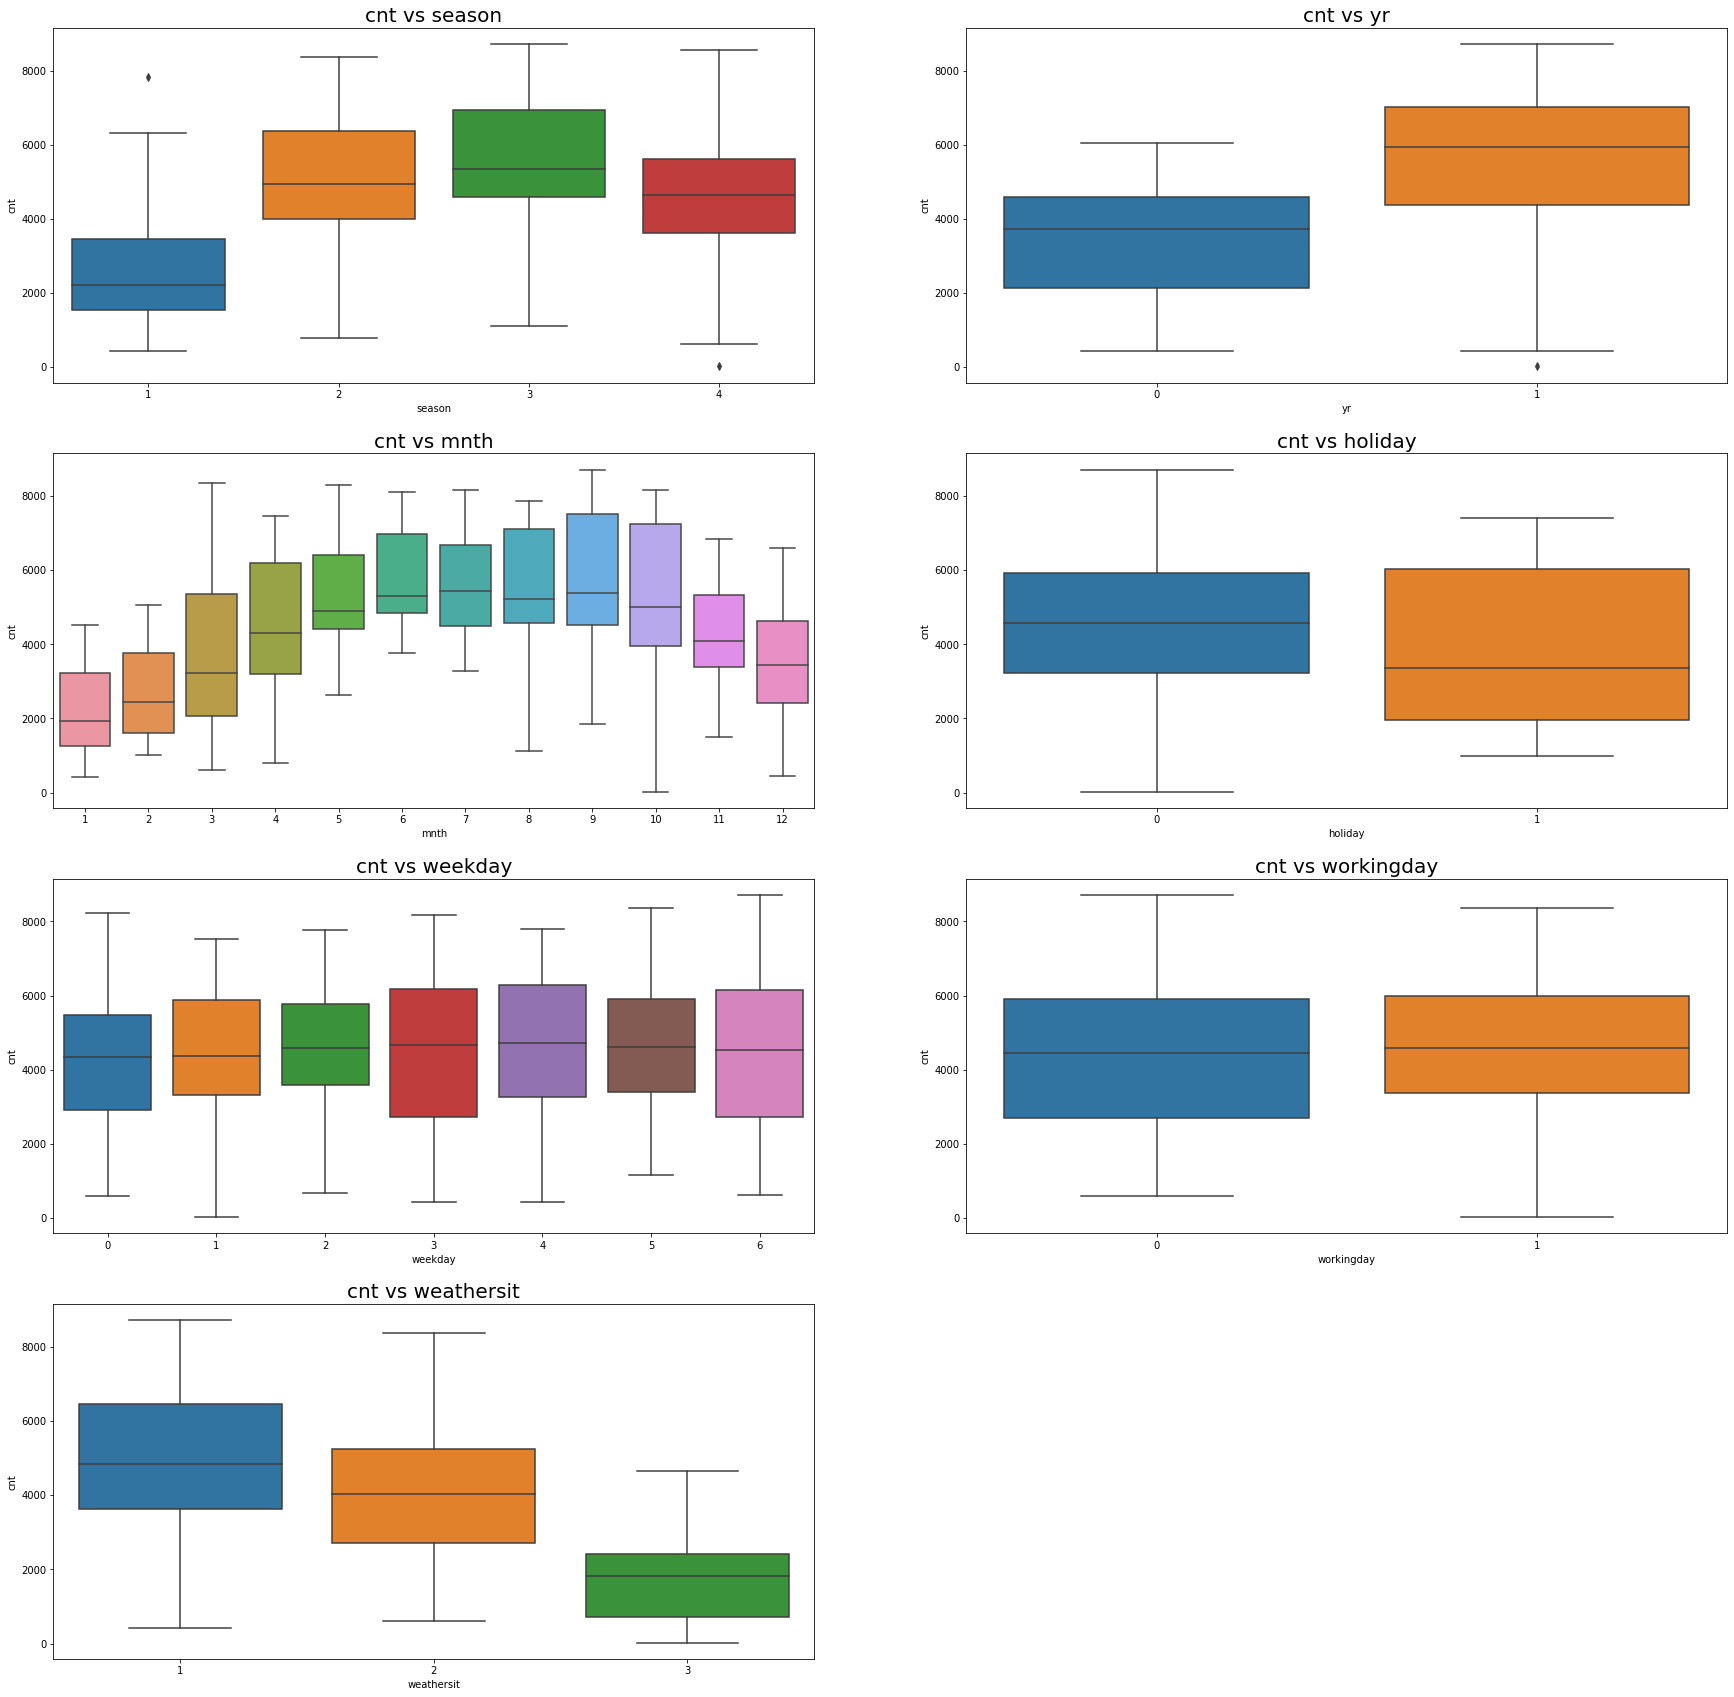

In [16]:
column_to_category = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

plot_boxplot(column_to_category, df, row=4, col=2)

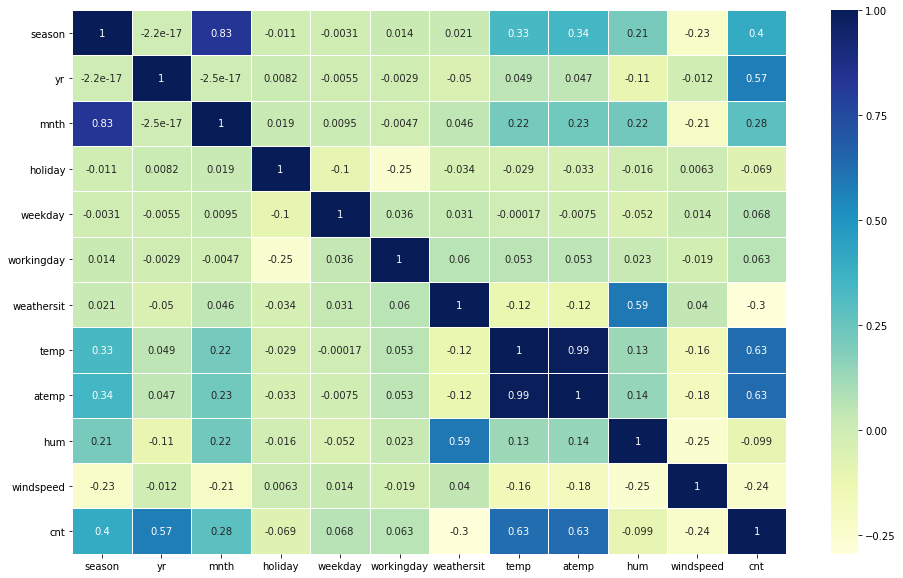

In [17]:
#let check the correlation
plt.figure(figsize = (16, 10))
ax = sns.heatmap(df.corr(), annot = True, cmap="YlGnBu", linewidth = 0.5)
plt.show()

#### Correlation between temp and atemp is 0.99 we can drop ```atemp``` column

In [18]:
df.drop(['atemp'], axis=1, inplace=True)

In [19]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


## Step 3: Data Preparation

#### Map ```weathersit```  column values as follows:
Dictionary values for ```weathersit``` column
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [20]:
df['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [21]:
weathersit_dict = {1: "clear_few_clouds", 2:"mist_cloudy", 3:"light_snow_rain", 4:"heavy_rain"}
df['weathersit'] = df['weathersit'].map(weathersit_dict)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,mist_cloudy,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,mist_cloudy,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,clear_few_clouds,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,clear_few_clouds,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,clear_few_clouds,9.305237,43.6957,12.522300,1600


#### Map season column values as follows:

- 1: spring
- 2: summer
- 3: fall
- 4: winter

In [22]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [23]:
season_dict = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
df['season'] = df['season'].map(season_dict)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,0,mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,1,0,1,1,clear_few_clouds,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,2,1,clear_few_clouds,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,3,1,clear_few_clouds,9.305237,43.6957,12.522300,1600


#### Map weekday column values as follows:

- 0: sunday
- 1: monday
- 2: tuesday
- 3: wednesday
- 4: thursday
- 5: friday
- 6: saturday

In [24]:
df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [25]:
weekday_dict = {0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'}
df['weekday'] = df.weekday.map(weekday_dict)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,saturday,0,mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,1,0,sunday,0,mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,1,0,monday,1,clear_few_clouds,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,tuesday,1,clear_few_clouds,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,wednesday,1,clear_few_clouds,9.305237,43.6957,12.522300,1600


#### Map mnth column values  => month ( 1 to 12)


In [26]:
df.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [27]:
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,saturday,0,mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,sunday,0,mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,monday,1,clear_few_clouds,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,tuesday,1,clear_few_clouds,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,wednesday,1,clear_few_clouds,9.305237,43.6957,12.522300,1600


In [28]:
# convert following columns to object type
column_to_category = ['season', 'mnth', 'weekday', 'weathersit']
df[column_to_category] = df[column_to_category].apply(lambda x: x.astype('object'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


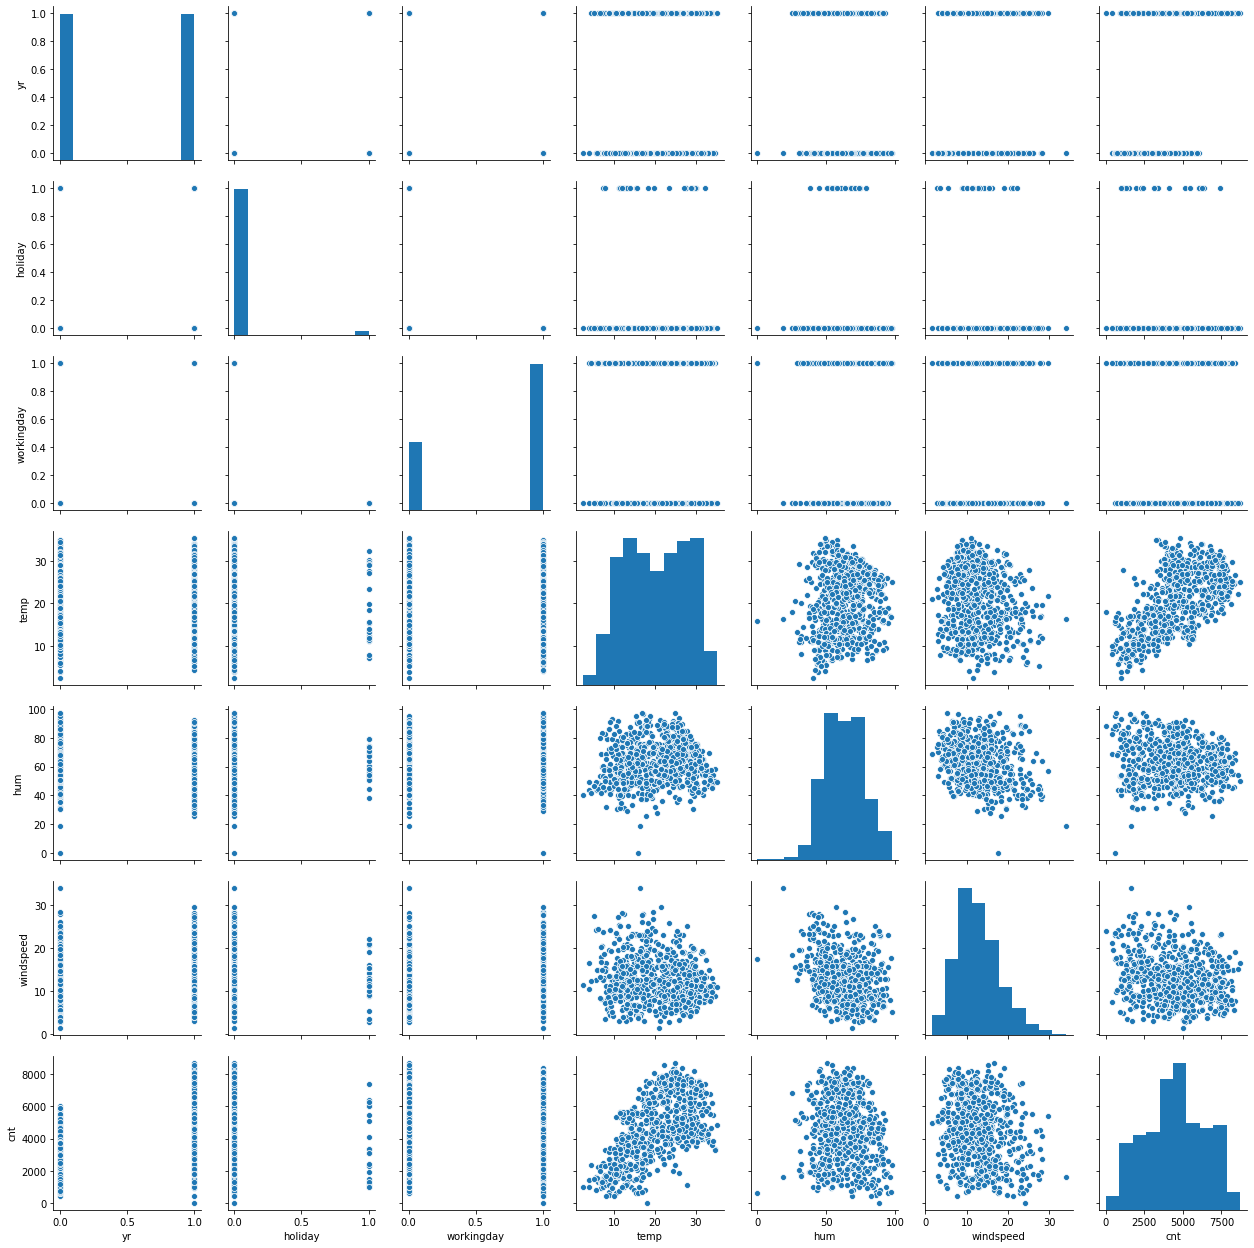

In [29]:
sns.pairplot(df)


### Creating the dummy variables

In [30]:
# Print unique values of columns
dummy_list = ['season', 'weathersit', 'mnth', 'weekday', 'holiday', 'yr', 'workingday']
for i in range(len(dummy_list)):
    print(f"{dummy_list[i]} ==>", df[dummy_list[i]].unique())

season ==> ['spring' 'summer' 'fall' 'winter']
weathersit ==> ['mist_cloudy' 'clear_few_clouds' 'light_snow_rain']
mnth ==> ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
weekday ==> ['saturday' 'sunday' 'monday' 'tuesday' 'wednesday' 'thursday' 'friday']
holiday ==> [0 1]
yr ==> [0 1]
workingday ==> [0 1]


In [31]:
# Create dummy variable for following categorical data 
dummy_list = ['season', 'weathersit', 'mnth', 'weekday']
dummy_varaible = pd.get_dummies(df[dummy_list], drop_first=True)

In [32]:
# Make copy of df to bike
bike = pd.concat([df, dummy_varaible], axis = 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
0,spring,0,Jan,0,saturday,0,mist_cloudy,14.110847,80.5833,10.749882,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,Jan,0,sunday,0,mist_cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,Jan,0,monday,1,clear_few_clouds,8.050924,43.7273,16.636703,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,Jan,0,tuesday,1,clear_few_clouds,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,Jan,0,wednesday,1,clear_few_clouds,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,1


In [33]:
# drop columns
bike.drop(dummy_list, axis=1, inplace=True)

In [34]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
# sns.pairplot(bike)
# plt.show()

## Step 4: Splitting the Data into Training and Testing Sets


### 4.1 Split the data into two part
- Train data (almost 70% of total data)
- Test data (almost 30% of total data)

In [36]:
# np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size=0.3, random_state = 100)

In [37]:
print("train data size ->", df_train.shape)
print("test data size  ->", df_test.shape)

train data size -> (510, 29)
test data size  -> (219, 29)


In [38]:
# df_train.head()

In [39]:
# df_test.head()

### 4.2 Rescaling the Features.
#### Following columns needs to be normalized.
- temp
- hum (humidity)
- windspeed (wind speed)

In [40]:
# scalar object 
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [41]:
# df_train.info()

In [42]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


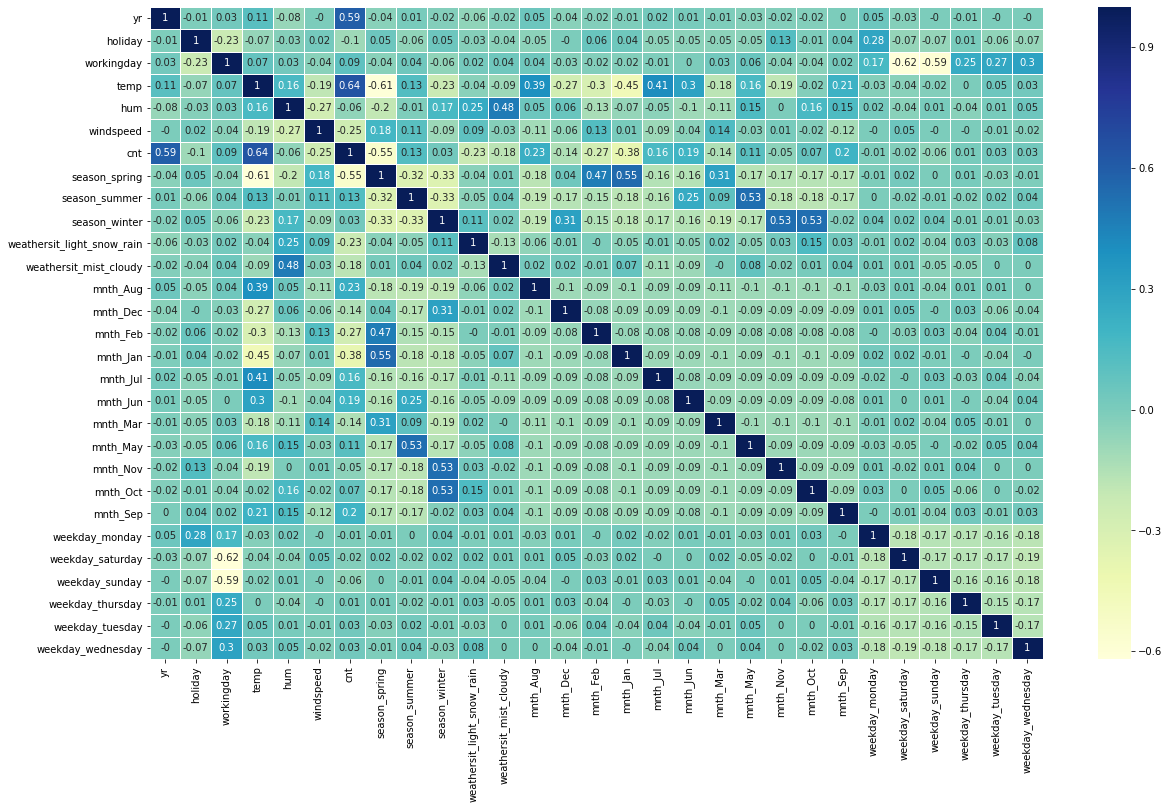

In [43]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 12))
sns.heatmap(round(df_train.corr(), 2), annot = True, cmap="YlGnBu", linewidths=1)
plt.show()

## Step 5: Building a linear model

### Dividing into X and Y sets for the model building


In [44]:
y_train = df_train.pop('cnt')
X_train = df_train

In [45]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_light_snow_rain,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

#### Creating function to get VIF

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def get_vif_data(vif_df):
    vif = pd.DataFrame()
    vif['Features'] = vif_df.columns
    vif['VIF'] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

#### We have almost 30 predictors to predict outcome (cnt), we will use RFE (Recursive Feature Elimination) method which will give set of variables in ranked order of importance

#### We will rank first 15 predictors

### 5.1 RFE (Recursive Feature Elimination)  

In [48]:
# LinearRegression object
lm = LinearRegression()
lm.fit(X_train, y_train)

# RFE object
rfe = RFE(lm, 13)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=13, step=1, verbose=0)

In [49]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Status': rfe.support_, 'Rank': rfe.ranking_})
rfe_df.sort_values(by=['Rank', 'Predictor'])

,Predictor,Status,Rank
1,holiday,True,1
4,hum,True,1
15,mnth_Jul,True,1
21,mnth_Sep,True,1
6,season_spring,True,1
7,season_summer,True,1
8,season_winter,True,1
3,temp,True,1
9,weathersit_light_snow_rain,True,1
10,weathersit_mist_cloudy,True,1


### 5.2 Model building

In [50]:
# Get top rank variables
cols = X_train.columns[rfe.support_]

In [51]:
# Function to build model
def build_model(X_train_lm_model, Y_train_model):

    # Create a first fitted model
    lr = sm.OLS(Y_train_model, X_train_lm_model)
    lr_model = lr.fit()

    # Get summary
    print(lr_model.summary())

    # return model
    return lr_model


### - Model 1.0

In [52]:
# Get cols
X_train_rfe_1 = X_train[cols]

# Add a constant
X_train_lm_1 = sm.add_constant(X_train_rfe_1)

# Call buld model
lr_model_1 = build_model(X_train_lm_1, y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Wed, 05 May 2021   Prob (F-statistic):          7.51e-190
Time:                        21:28:17   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     496   BIC:                            -934.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [53]:
# Get VIF
get_vif_data(X_train_rfe_1)

,Features,VIF
3,hum,28.06
2,temp,16.05
4,windspeed,4.67
5,season_spring,4.03
7,season_winter,3.36
6,season_summer,2.78
9,weathersit_mist_cloudy,2.28
0,yr,2.08
10,mnth_Jul,1.58
11,mnth_Sep,1.39


### From above observations, we see that P value for ```weekday_saturday``` is  ( >0.05 ) , which is not significant
So we can drop this feature and design model again

### - Model 2.0

In [54]:
#  drop columns
cols = cols.drop('weekday_saturday')
X_train_rfe_2 = X_train[cols]

In [55]:
# Get cols
X_train_rfe_2 = X_train[cols]

# Add a constant
X_train_lm_2 = sm.add_constant(X_train_rfe_2)

# Call build model
lr_model_2 = build_model(X_train_lm_2, y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 05 May 2021   Prob (F-statistic):          1.69e-190
Time:                        21:28:17   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [56]:
# Get VIF
get_vif_data(X_train_rfe_2)

,Features,VIF
3,hum,28.06
2,temp,16.02
4,windspeed,4.65
5,season_spring,4.01
7,season_winter,3.35
6,season_summer,2.78
9,weathersit_mist_cloudy,2.28
0,yr,2.08
10,mnth_Jul,1.58
11,mnth_Sep,1.38


### From above observations, we see that VIF value for ```hum``` is high (> 5) , which is not significant
So we can drop this feature and design model again

### Model 3.0

In [57]:
#  drop columns
cols = cols.drop('hum')
X_train_rfe_3 = X_train[cols]

In [58]:
# Get cols
X_train_rfe_3 = X_train[cols]

# Add a constant
X_train_lm_3 = sm.add_constant(X_train_rfe_3)

# Call build model
lr_model_3 = build_model(X_train_lm_3, y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 05 May 2021   Prob (F-statistic):          2.40e-187
Time:                        21:28:18   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [59]:
# Get VIF
get_vif_data(X_train_rfe_3)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,season_summer,2.21
4,season_spring,2.08
0,yr,2.07
6,season_winter,1.79
9,mnth_Jul,1.58
8,weathersit_mist_cloudy,1.55
10,mnth_Sep,1.34
7,weathersit_light_snow_rain,1.08


### Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

In [60]:
# Assign final model vaiables
lr_model = lr_model_3
X_train_rfe = X_train_rfe_3
X_train_lm = X_train_lm_3

## Step 7: Residual Analysis of the train data

In [61]:
# predict value
y_train_pred = lr_model.predict(X_train_lm)

# residual value
residual = y_train_pred - y_train

#### R2 score

In [62]:
r2_score(y_train, y_train_pred)

0.8357767594654057

#### MSE

In [63]:
mse = mean_squared_error(y_train, y_train_pred)
mse

0.00826747798153189

Text(0.5, 0, 'Errors')

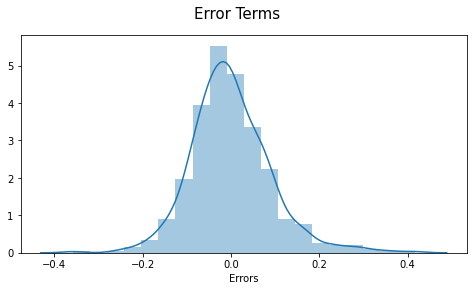

In [64]:
# Plot the histogram of the error terms
plt.figure(figsize = (8, 4))
sns.distplot(residual, bins = 20)
plt.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 10)                         # X-label

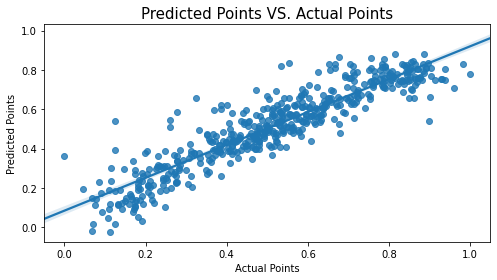

In [65]:
fig = plt.figure(figsize = (8, 4))
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points VS. Actual Points', fontdict={'fontsize': 15})
plt.xlabel('Actual Points', fontdict={'fontsize': 10})
plt.ylabel('Predicted Points', fontdict={'fontsize': 10})
plt.show()

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

### Scaling on test data

In [66]:
# scalar object 
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
184,0,1,0,0.837241,0.534223,0.149393,0.704300,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.911423,0.470417,0.231142,0.725421,0,1,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.496221,0.777843,0.443398,0.278853,0,0,1,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.890387,0.236659,0.449707,0.545512,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.821739,0.070765,0.682387,0.569148,0,1,0,...,0,0,0,0,0,0,0,1,0,0


#### Dividing into X_test and y_test

In [67]:
y_test = df_test.pop('cnt')
X_test = df_test

In [68]:
# column list from final model
test_clm = list(X_train_rfe.columns)
X_test_lm = X_test[test_clm]

In [69]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test_lm)
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_light_snow_rain,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
184,0,1,0,0.837241,0.534223,0.149393,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.911423,0.470417,0.231142,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.496221,0.777843,0.443398,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.890387,0.236659,0.449707,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.821739,0.070765,0.682387,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [70]:
y_test.head()

184    0.704300
535    0.725421
299    0.278853
221    0.545512
152    0.569148
Name: cnt, dtype: float64

#### Prediction on selected model

In [71]:
y_pred = lr_model.predict(X_test_lm)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

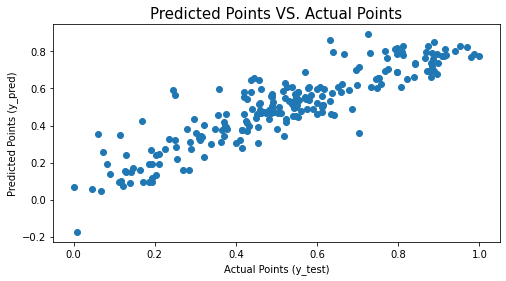

In [72]:
fig = plt.figure(figsize = (8, 4))
plt.scatter(x=y_test, y=y_pred)
plt.title('Predicted Points VS. Actual Points', fontdict={'fontsize': 15})
plt.xlabel('Actual Points (y_test)', fontdict={'fontsize': 10})
plt.ylabel('Predicted Points (y_pred)', fontdict={'fontsize': 10})
plt.show()

#### R2 score

In [73]:
r2_score(y_test, y_pred)

0.794644165550302

#### MSE

In [74]:
mse = mean_squared_error(y_test, y_pred)
mse

0.01164744289740455

In [75]:
params = pd.DataFrame(lr_model.params)
params = params.reset_index()
params.columns = ["Variables", "Coefficient"]
params

,Variables,Coefficient
0,const,0.199648
1,yr,0.233482
2,holiday,-0.098013
3,temp,0.491508
4,windspeed,-0.147977
5,season_spring,-0.066942
6,season_summer,0.045280
7,season_winter,0.083084
8,weathersit_light_snow_rain,-0.285155
9,weathersit_mist_cloudy,-0.081558


### Equestion for the best fitted line:

cnt ='0.1996 + (0.23348 X yr) + (-0.09801 X holiday) + (0.49151 X temp) + (-0.14798 X windspeed) + (-0.06694 X season_spring) + (0.04528 X season_summer) + (0.08308 X season_winter) + (-0.28516 X weathersit_light_snow_rain) + (-0.08156 X weathersit_mist_cloudy) + (-0.05242 X mnth_Jul) + (0.07669 X mnth_Sep)

#### - All positive coefficients like temp, season_summer, season_winter, mnth_Sep indicates that increase in these values will lead to an increase in the value of cnt.
####  - All negative coefficients indicates that increase in these values lead to decrease in cnt.

1. Temp is most significant and has large coefficient
3. Following that season_summer and season_winter affecting rental postively as compare to season_spring
3. Following that weathersit_light_snow_rain and weathersit_mist_cloudy affecting rental
4. Bike rental reduces in holiday

Which indicates that bike rental is highly affected by temperature,season and month.

In [76]:
# function to get final question
# def get_equ()
#     coeff = list(params.Coefficient)
#     var = list(params.Variables)
#     vc_dict = {}
#     for i in range(len(var)):
#         vc_dict[var[i]] = coeff[i]
#     const = vc_dict['const']
#     del vc_dict['const']
#     equ = f"{round(const, 4)} + "
#     for key, values in vc_dict.items():
#         equ += f"({round(values, 5)} X {key}) + "
#     return equ    